In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('saved-items/clustered-dataset.csv')

df.head()

,Num_children,Child,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total,labels
0,0,0,58138,635,88,546,172,88,88,1617,1
1,2,1,46344,11,1,6,2,1,6,27,0
2,0,0,71613,426,49,127,111,21,42,776,1
3,1,1,26646,11,4,20,10,3,5,53,0
4,1,1,58293,173,43,118,46,27,15,422,0


In [3]:
# Group 0
label0 = df[df['labels'] == 0].copy()
label0.drop(columns=['labels'], inplace=True)
label0.reset_index(inplace=True, drop=True)

# Group 1
label1 = df[df['labels'] == 1].copy()
label1.drop(columns=['labels'], inplace=True)
label1.reset_index(inplace=True, drop=True)

# Group 2
label2 = df[df['labels'] == 2].copy()
label2.drop(columns=['labels'], inplace=True)
label2.reset_index(inplace=True, drop=True)

# Group 3
label3 = df[df['labels'] == 3].copy()
label3.drop(columns=['labels'], inplace=True)
label3.reset_index(inplace=True, drop=True)

In [4]:
label0.describe()[['Num_children', 'Child', 'Income', 'Total']]

,Num_children,Child,Income,Total
count,1126.000000,1126.0,1126.000000,1126.000000
mean,1.407638,1.0,38611.973357,164.061279
std,0.567172,0.0,13248.518491,169.252266
min,1.000000,1.0,2447.000000,5.000000
25%,1.000000,1.0,29687.000000,44.000000
50%,1.000000,1.0,38447.500000,81.000000
75%,2.000000,1.0,47817.750000,258.000000
max,3.000000,1.0,79146.000000,1730.000000


In [5]:
label1.describe()[['Num_children', 'Child', 'Income', 'Total']]

,Num_children,Child,Income,Total
count,443.0,443.0,443.000000,443.000000
mean,0.0,0.0,76639.577878,1448.589165
std,0.0,0.0,10055.052489,393.550457
min,0.0,0.0,33051.000000,725.000000
25%,0.0,0.0,70471.500000,1149.000000
50%,0.0,0.0,77457.000000,1396.000000
75%,0.0,0.0,82603.500000,1716.500000
max,0.0,0.0,105471.000000,2525.000000


In [6]:
label2.describe()[['Num_children', 'Child', 'Income', 'Total']]

,Num_children,Child,Income,Total
count,183.0,183.0,183.000000,183.000000
mean,0.0,0.0,37066.830601,274.306011
std,0.0,0.0,19803.296983,262.774575
min,0.0,0.0,1730.000000,6.000000
25%,0.0,0.0,22404.500000,60.500000
50%,0.0,0.0,32727.000000,162.000000
75%,0.0,0.0,50150.000000,438.000000
max,0.0,0.0,113734.000000,1049.000000


In [7]:
label3.describe()[['Num_children', 'Child', 'Income', 'Total']]

,Num_children,Child,Income,Total
count,449.000000,449.0,449.000000,449.000000
mean,1.124722,1.0,65419.775056,1020.385301
std,0.362948,0.0,9327.961936,341.371552
min,1.000000,1.0,36550.000000,393.000000
25%,1.000000,1.0,58821.000000,766.000000
50%,1.000000,1.0,64795.000000,969.000000
75%,1.000000,1.0,71499.000000,1182.000000
max,3.000000,1.0,94871.000000,2194.000000


# Initial Findings
Focusing on the first three columns, it appears that none of the people in Group 1 and 2 have children. However, they differ in the `Income` column, where Group 1 earns more than Group 2, on average.

In a similar fashion, Group 0 and 4 seem to be the groups with children. They also differ in income, where Group 3 earns more, on average.

In [8]:
# No children, low income
nc_low = label2.copy()

# No children, high income
nc_high = label1.copy()

In [9]:
# Children, low income
c_low = label0.copy()

# Children, high income
c_high = label3.copy()

In [10]:
print(f"""
No children, low income: {nc_low.shape[0]}
No children, high income: {nc_high.shape[0]}

Children, low income: {c_low.shape[0]}
Children, high income: {c_high.shape[0]}
""")


No children, low income: 183
No children, high income: 443

Children, low income: 1126
Children, high income: 449



In [11]:
no_children_total = nc_low.shape[0] + nc_high.shape[0]
children_total = c_low.shape[0] + c_high.shape[0]

# Income
low_income_total = nc_low.shape[0] + c_low.shape[0]
high_income_total = nc_high.shape[0] + c_high.shape[0]

In [12]:
print(f"""
CHILDREN
No Children: {no_children_total}
Children:    {children_total}
------------------
INCOME
Low Income:  {low_income_total}
High Income: {high_income_total}
""")


CHILDREN
No Children: 626
Children:    1575
------------------
INCOME
Low Income:  1309
High Income: 892



In [13]:
nc_low.head()

,Num_children,Child,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,0,0,7500,6,16,11,11,1,16,61
1,0,0,17323,3,14,17,6,1,5,46
2,0,0,37760,84,5,38,150,12,28,317
3,0,0,37040,86,2,73,69,38,48,316
4,0,0,18589,6,4,25,15,12,13,75


In [14]:
nc_low.columns

Index(['Num_children', 'Child', 'Income', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'Total'],
      dtype='object')

In [15]:
nc_low_dropped = nc_low.drop(columns=['Num_children', 'Child']).copy()
nc_low_dropped.head()

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,7500,6,16,11,11,1,16,61
1,17323,3,14,17,6,1,5,46
2,37760,84,5,38,150,12,28,317
3,37040,86,2,73,69,38,48,316
4,18589,6,4,25,15,12,13,75


In [16]:
# Look at what contributed the most
nc_low_dropped.corr()['Total'].sort_values(ascending=False)

Total     1.000000
Wines     0.836863
Meat      0.814073
Income    0.725211
Gold      0.501308
Fish      0.429706
Fruits    0.407444
Sweets    0.362282
Name: Total, dtype: float64

In [17]:
nc_high_dropped = nc_high.drop(columns=['Num_children', 'Child']).copy()
nc_high_dropped.head()

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,58138,635,88,546,172,88,88,1617
1,71613,426,49,127,111,21,42,776
2,63033,194,61,480,225,112,30,1102
3,82800,1006,22,115,59,68,45,1315
4,84618,684,100,801,21,66,0,1672


In [18]:
# Look at what contributed the most
nc_high_dropped.corr()['Total'].sort_values(ascending=False)

Total     1.000000
Wines     0.714621
Meat      0.628167
Income    0.352276
Fruits    0.156591
Sweets    0.126303
Fish      0.118509
Gold      0.071895
Name: Total, dtype: float64

In [19]:
nc_high_dropped[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]

,Wines,Fruits,Meat,Fish,Sweets,Gold
0,635,88,546,172,88,88
1,426,49,127,111,21,42
2,194,61,480,225,112,30
3,1006,22,115,59,68,45
4,684,100,801,21,66,0
...,...,...,...,...,...,...
438,519,71,860,93,27,53
439,594,51,631,72,55,32
440,332,194,377,149,125,57
441,712,26,538,69,13,80


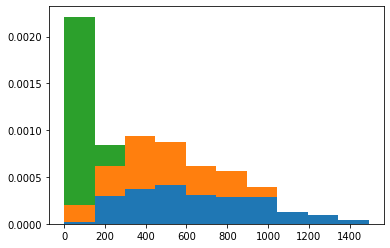

In [20]:
plt.figure()
plt.hist([nc_high_dropped['Wines'].tolist(), nc_high_dropped['Meat'].tolist(), nc_high_dropped['Fruits'].tolist()], stacked=True, density=True)
plt.show()

In [22]:
# fig = px.histogram(nc_high_dropped, x='Total', color='Wines')

# fig.show()

In [78]:
nc_high_dropped

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,58138,635,88,546,172,88,88,1617
1,71613,426,49,127,111,21,42,776
2,63033,194,61,480,225,112,30,1102
3,82800,1006,22,115,59,68,45,1315
4,84618,684,100,801,21,66,0,1672
...,...,...,...,...,...,...,...,...
438,88325,519,71,860,93,27,53,1623
439,80617,594,51,631,72,55,32,1435
440,82032,332,194,377,149,125,57,1234
441,75777,712,26,538,69,13,80,1438


In [ ]:
fig = go.Figure()



# TODO Normalize the data

In [24]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=nc_high_dropped['Total']))
fig.add_trace(go.Histogram(x=nc_high_dropped['Wines']))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
# 

In [35]:
nc_low[['Num_children', 'Child']]

,Num_children,Child
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
178,0,0
179,0,0
180,0,0
181,0,0


In [5]:
label3.isna().sum()

Num_children    0
Child           0
Income          0
Wines           0
Fruits          0
Meat            0
Fish            0
Sweets          0
Gold            0
Total           0
dtype: int64

In [9]:
label0.head()

,Num_children,Child,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,2,1,46344,11,1,6,2,1,6,27
1,1,1,26646,11,4,20,10,3,5,53
2,1,1,58293,173,43,118,46,27,15,422
3,1,1,33454,76,10,56,3,1,23,169
4,1,1,30351,14,0,24,3,3,2,46


In [11]:
# No children, high income
nc_hi = label1.copy()

In [13]:
# No children, low income
nc_li = label2.copy()

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

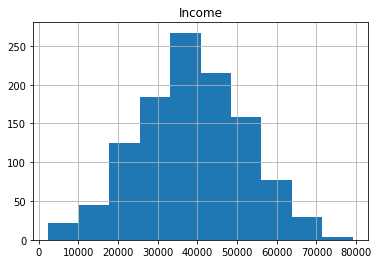

In [16]:
label0.hist(['Income'])

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

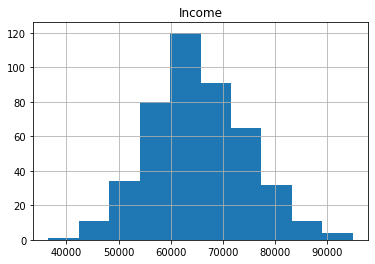

In [17]:
label3.hist(['Income'])

In [45]:
# grouped = label1.groupby(['Total'])['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'].mean()

In [46]:
# grouped.plot(kind='bar', stacked=True)

# plt.show()

In [47]:
# grouped.describe()

In [37]:
label1.describe()

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,76639.577878,649.474041,67.234763,490.074492,97.516930,67.961625,76.327314,1448.589165
std,10055.052489,311.303814,51.204885,229.846518,64.942868,51.719972,61.995576,393.550457
min,33051.000000,68.000000,0.000000,48.000000,0.000000,0.000000,0.000000,725.000000
25%,70471.500000,398.000000,26.000000,320.500000,43.000000,27.500000,30.000000,1149.000000
50%,77457.000000,605.000000,51.000000,459.000000,86.000000,54.000000,53.000000,1396.000000
75%,82603.500000,880.000000,102.000000,673.500000,146.000000,102.000000,111.500000,1716.500000
max,105471.000000,1493.000000,197.000000,984.000000,254.000000,198.000000,249.000000,2525.000000


In [54]:
label1.drop(['Num_children', 'Child'], axis=1).corr()['Income']['Total']

0.3522762892317645

In [56]:
label0.drop(['Num_children', 'Child'], axis=1).corr()['Income']['Total']

0.5438651018909356

In [57]:
label2.drop(['Num_children', 'Child'], axis=1).corr()['Income']['Total']

0.725211346296854

In [58]:
label3.drop(['Num_children', 'Child'], axis=1).corr()['Income']['Total']

0.46477321874600475

In [16]:
label1.Total.value_counts()

1149    4
1574    4
1366    4
1033    4
1919    3
       ..
817     1
818     1
1331    1
1588    1
1779    1
Name: Total, Length: 350, dtype: int64